In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.rc('font', family='NanumBarunGothic')

# 구글 드라이브 마운트
#from google.colab import drive
#drive.mount('/content/drive')

# CSV 파일이 저장된 폴더 경로
folder_path = r'C:\DB_Processing-main\data_csv\result_EnergyConsumption'

ctr = ['계', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']

# 해당 폴더 내의 모든 CSV 파일 목록
file_list = sorted([f for f in os.listdir(folder_path) if f.startswith('result_EnergyConsumption') and f.endswith('.csv')])

# 첫 번째 행의 데이터를 저장할 빈 데이터프레임 생성
first_row_data = pd.DataFrame()

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로 설정
folder_path = 'data_csv/result_EnergyConsumption'

# 빈 데이터프레임 초기화
corrected_df = pd.DataFrame()

# 각 파일을 반복 처리
for file in sorted(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, file)
    # CSV 파일을 로드하고 전치
    temp_df = pd.read_csv(file_path, header=None).transpose()
    # 첫 번째 행을 열 이름으로, 두 번째 행을 데이터로 추출
    headers = temp_df.iloc[0]
    data = temp_df.iloc[1]
    # 추출된 데이터로 데이터프레임 생성
    year_df = pd.DataFrame([data.values], columns=headers.values)
    # 파일 이름에서 연도 추출하여 데이터프레임에 추가
    year_df['Year'] = file.split('_')[2].split('.')[0]
    # 최종 데이터프레임에 추가
    corrected_df = pd.concat([corrected_df, year_df], ignore_index=True)
    # 'Year' 열을 가장 앞으로 이동
cols = ['Year'] + [col for col in corrected_df.columns if col != 'Year']
reordered_df = corrected_df[cols]

# '지역' 열의 모든 값을 비우기
reordered_df.drop(columns=['지역'], inplace=True)

# 결과 출력
print(reordered_df)


# 결과 출력
reordered_df



   Year          계       서울       부산       대구        인천      광주       대전  \
0  2013  151037242  1874442  3409887   757691  18072346  414002   588745   
1  2014  153577930  1550804  2993116   795881  17921528  387182   578692   
2  2015  156068140  2618653  2296291  1272745  16809442  446765   964900   
3  2016  161781939  2662272  2676683  1331104  16872197  434046   986728   
4  2017  163279779  2569371  2410981  1261012  15515030  436038  1005900   
5  2018  169560784        X  2855285  1253583  15735772  424060   978717   
6  2019  168155187        X  2439942  1254363  14882143  395984   944966   
7  2020  154943952        X  2435787  1099122  14231935  386334   905867   
8  2021  162357441        X        X  1211986  14654026  410061   930373   
9  2022  159111027        X        X  1165227  13359509  409018   915067   

         울산      세종        경기       강원       충북        충남       전북        전남  \
0  12881205  259252  11441370  4244324  2634862  39662689  3224579  23214821   
1  

C:\Users\tntcl\AppData\Local\Temp\ipykernel_7572\3817265400.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df.drop(columns=['지역'], inplace=True)


,Year,계,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2013,151037242,1874442,3409887,757691,18072346,414002,588745,12881205,259252,11441370,4244324,2634862,39662689,3224579,23214821,11453904,16215053,688070
1,2014,153577930,1550804,2993116,795881,17921528,387182,578692,11800069,654615,11629215,4720757,2637086,41881226,3354212,24472807,12367713,15257463,575564
2,2015,156068140,2618653,2296291,1272745,16809442,446765,964900,11633572,667899,15321567,4327134,2859920,40335652,3204958,25049474,12316209,15352034,590925
3,2016,161781939,2662272,2676683,1331104,16872197,434046,986728,12524581,669640,16579835,4899104,3058978,40701915,4083519,25705296,12586222,15410431,599390
4,2017,163279779,2569371,2410981,1261012,15515030,436038,1005900,12085644,707323,17398695,7590760,3030615,42335153,3708974,26274480,12156146,14237617,556041
5,2018,169560784,X,2855285,1253583,15735772,424060,978717,13654384,X,19710579,9699068,3024003,41983514,X,26490564,12538749,13572539,426181
6,2019,168155187,X,2439942,1254363,14882143,395984,944966,13655002,X,20231032,9050792,3164568,43358334,X,26556767,12540730,12155022,444602
7,2020,154943952,X,2435787,1099122,14231935,386334,905867,12871197,X,19411964,7667671,3276264,39285683,3320002,24500001,12102220,8971442,413364
8,2021,162357441,X,X,1211986,14654026,410061,930373,X,X,21441502,8057999,3333840,38891705,X,26149345,12123634,10960519,461836
9,2022,159111027,X,X,1165227,13359509,409018,915067,X,X,22641088,9108374,3359185,38337059,X,23626333,10673381,12278005,630321


# **결측치 처리 및 단위 변경**

In [65]:
# 'X' 값을 0으로 변경
reordered_df.replace('X', 0, inplace=True)
columns_to_multiply = reordered_df.columns.difference(['Year'])
reordered_df[columns_to_multiply] = reordered_df[columns_to_multiply].apply(pd.to_numeric) * 11.63
reordered_df[['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']]
reordered_df = reordered_df.round().astype(int)
# 결과 출력
print(reordered_df)
reordered_df

   Year           계        서울        부산        대구         인천       광주  \
0  2013  1756563124  21799760  39656986   8811946  210181384  4814843   
1  2014  1786111326  18035851  34809939   9256096  208427371  4502927   
2  2015  1815072468  30454934  26705864  14802024  195493810  5195877   
3  2016  1881523951  30962223  31129823  15480740  196223651  5047955   
4  2017  1898943830  29881785  28039709  14665570  180439799  5071122   
5  2018  1971991918         0  33206965  14579170  183007028  4931818   
6  2019  1955644825         0  28376525  14588242  173079323  4605294   
7  2020  1801998162         0  28328203  12782789  165517404  4493064   
8  2021  1888217039         0         0  14095397  170426322  4769009   
9  2022  1850461244         0         0  13551590  155371090  4756879   

         대전         울산       세종         경기         강원        충북         충남  \
0   6847104  149808414  3015101  133063133   49361488  30643445  461277073   
1   6730188  137234802  7613172  1352477

C:\Users\tntcl\AppData\Local\Temp\ipykernel_7572\709716435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df.replace('X', 0, inplace=True)
C:\Users\tntcl\AppData\Local\Temp\ipykernel_7572\709716435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df[columns_to_multiply] = reordered_df[columns_to_multiply].apply(pd.to_numeric) * 11.63


,Year,계,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2013,1756563124,21799760,39656986,8811946,210181384,4814843,6847104,149808414,3015101,133063133,49361488,30643445,461277073,37501854,269988368,133208904,188581066,8002254
1,2014,1786111326,18035851,34809939,9256096,208427371,4502927,6730188,137234802,7613172,135247770,54902404,30669310,487078658,39009486,284618745,143836502,177444295,6693809
2,2015,1815072468,30454934,26705864,14802024,195493810,5195877,11221787,135298442,7767665,178189824,50324568,33260870,469103633,37273662,291325383,143237511,178544155,6872458
3,2016,1881523951,30962223,31129823,15480740,196223651,5047955,11475647,145660877,7787913,192823481,56976580,35575914,473363271,47491326,298952592,146377762,179223313,6970906
4,2017,1898943830,29881785,28039709,14665570,180439799,5071122,11698617,140556040,8226166,202346823,88280539,35246052,492357829,43135368,305572202,141375978,165583486,6466757
5,2018,1971991918,0,33206965,14579170,183007028,4931818,11382479,158800486,0,229234034,112800161,35169155,488268268,0,308085259,145825651,157848629,4956485
6,2019,1955644825,0,28376525,14588242,173079323,4605294,10989955,158807673,0,235286902,105260711,36803926,504257424,0,308855200,145848690,141362906,5170721
7,2020,1801998162,0,28328203,12782789,165517404,4493064,10535233,149692021,0,225761141,89175014,38102950,456892493,38611623,284935012,140748819,104337870,4807423
8,2021,1888217039,0,0,14095397,170426322,4769009,10820238,0,0,249364668,93714528,38772559,452310529,0,304116882,140997863,127470836,5371153
9,2022,1850461244,0,0,13551590,155371090,4756879,10642229,0,0,263315853,105930390,39067322,445859996,0,274774253,124131421,142793198,7330633


In [52]:
file_path = r'C:\DB_Processing-main\data_csv\result_EnergyGeneration\result_EnergyGeneration_Region.csv'
regiongendata = pd.read_csv(file_path, encoding='EUC-KR')
regiongendata = regiongendata.round().astype(int)

regiongendata = regiongendata.sort_values(by='연도', ascending=True)
# 데이터 확인
regiongendata

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
10,2012,1981199,35685485,264243,76386995,138121,239222,14609288,0,28546977,11582557,1264902,118763839,7765133,64461509,70202138,74601938,3080783
9,2013,2184346,38074350,302056,80861254,581864,231663,14048956,0,30309811,12206499,1285358,121230287,7927838,67705185,68716362,68300364,3181681
8,2014,799391,37424885,513395,73425270,399737,151727,9961740,0,28777547,10011236,808047,122694924,7618852,77493308,73125603,75684560,3080679
7,2015,768860,47218627,2816369,68377707,383433,168642,9065208,8660,45075935,8066843,687366,114076266,6539840,78460707,84607657,58739603,3029468
6,2016,874131,51006660,3105758,65939273,429418,186769,13583162,2840978,57085319,10598883,1156380,111645164,9674002,69054766,81884729,58252913,3122549
5,2017,841569,26550923,2673615,62555723,480426,184668,22677064,3052432,61850744,20911898,1293887,131897043,9715713,66047667,84097328,55565893,3133515
4,2018,640739,38495983,2649459,62929390,514494,183669,20588807,3718199,74188982,30980844,1626983,129631998,11742505,60066484,76124556,53192098,3371319
3,2019,1846891,37527898,2877896,60052895,562075,167975,29016049,2463630,73976878,28715888,1604431,123904967,12282267,55753829,79827086,48465022,3994629
2,2020,5122176,40647380,2568644,57135627,609551,167834,29808674,3552567,72512661,27875047,2221149,114103936,12599529,58217106,85865577,35332874,3821827
1,2021,5343889,40353946,2811757,60506262,644018,182180,31503575,3776644,82232650,30622785,2204816,111228524,14322433,61841016,81381672,43885393,3967926


In [78]:
rd = reordered_df[['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']]

In [0]:
rgd = regiongendata[['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']]

# 자급률

In [107]:
import numpy as np
selfsuf = rgd.div(rd)*100
selfsuf.replace([np.inf, -np.inf], np.nan, inplace=True)
selfsuf.fillna(0, inplace=True)
years=list(range(2012,2023))
selfsuf.index = years
selfsuf

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2012,19.893586,117.455545,28.017829,25.826956,15.972130,4.308873,22.456235,108.742725,64.465763,68.629467,9.017263,23.372683,39.973808,21.994851,67.445865,26.238897,60.172459
2013,29.629259,115.926506,30.377353,29.029902,14.302208,2.706908,22.955966,49.606708,60.801483,55.776765,7.188998,22.835844,36.715257,21.727668,56.579290,24.731927,59.277550
2014,16.818871,152.203950,17.353330,29.226310,11.731436,1.495608,22.031794,45.735327,40.694053,55.390534,6.677964,24.323823,33.802767,19.983534,59.946292,19.789432,55.610773
2015,5.964982,120.552879,18.590171,30.604310,11.134707,1.463752,19.920276,31.634021,38.365078,50.399459,4.509880,26.175450,25.862127,18.649723,54.534982,27.041695,57.304302
2016,2.144246,137.290950,18.065844,34.875560,10.145565,1.570006,14.648113,45.199659,36.664268,35.093628,4.616072,26.328818,27.222452,19.657051,53.845467,32.124036,52.133071
2017,0.000000,79.955886,18.338595,34.182142,9.741357,1.622388,14.280223,0.000000,26.981484,18.538890,3.679039,27.013233,0.000000,21.438113,57.669777,35.202012,63.220508
2018,0.000000,179.749494,21.289460,38.097718,9.324443,1.699452,8.553215,0.000000,24.262005,10.069173,3.142002,22.140510,0.000000,22.358298,56.143616,41.208061,60.389044
2019,0.000000,166.684159,22.032508,41.311491,8.533887,1.600743,6.055906,0.000000,19.966206,9.046080,1.803971,24.967857,16.937491,27.536352,60.112516,56.297491,63.016464
2020,0.000000,0.000000,3.642288,43.083292,8.381972,1.402252,0.000000,0.000000,11.540347,10.682694,2.084069,27.126259,0.000000,25.481423,51.862916,59.374020,57.356009
2021,0.000000,0.000000,2.228934,52.043951,12.232054,2.176828,0.000000,0.000000,11.510819,11.523132,3.290110,27.190214,0.000000,24.640294,55.357750,47.831665,43.402541


# **막대그래프**

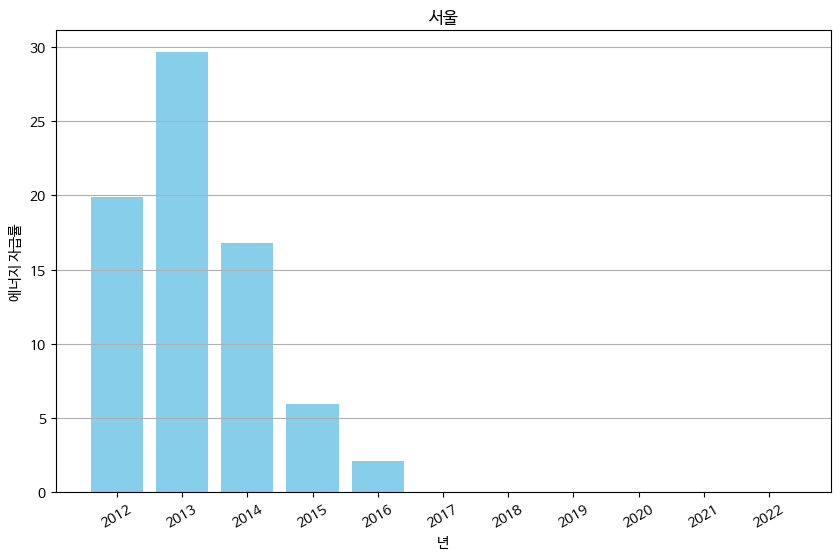

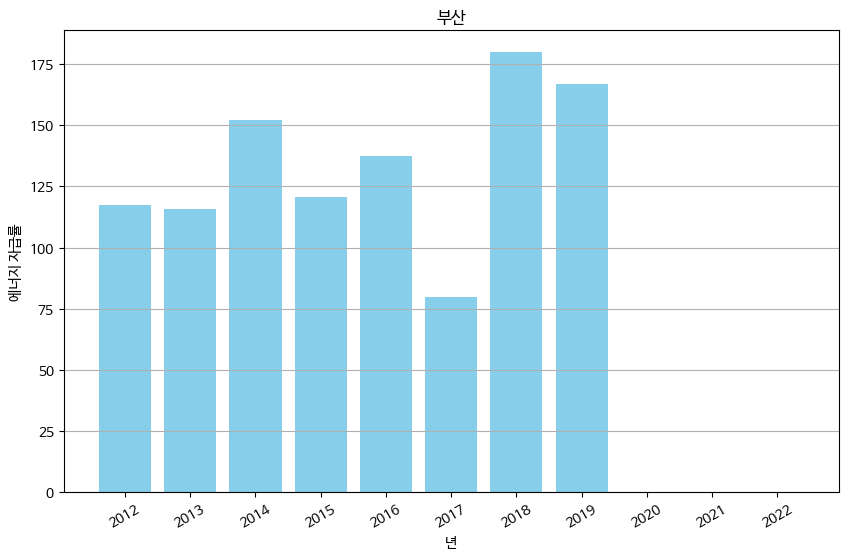

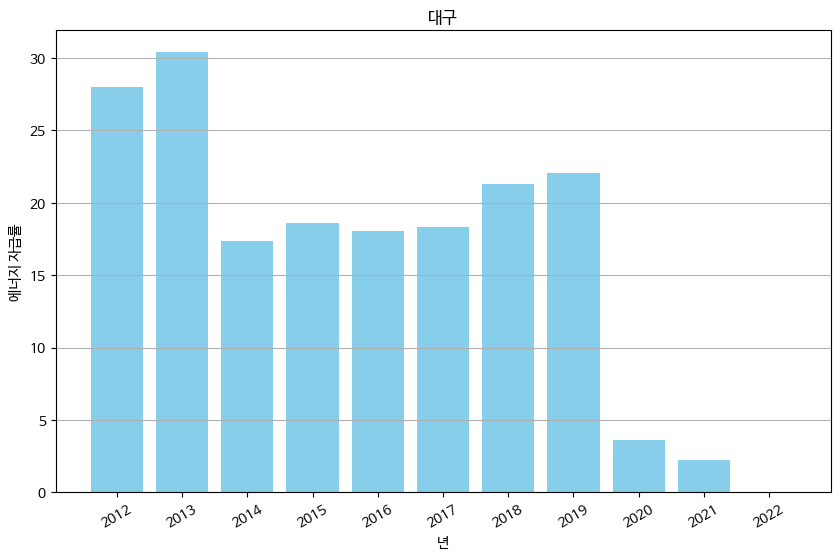

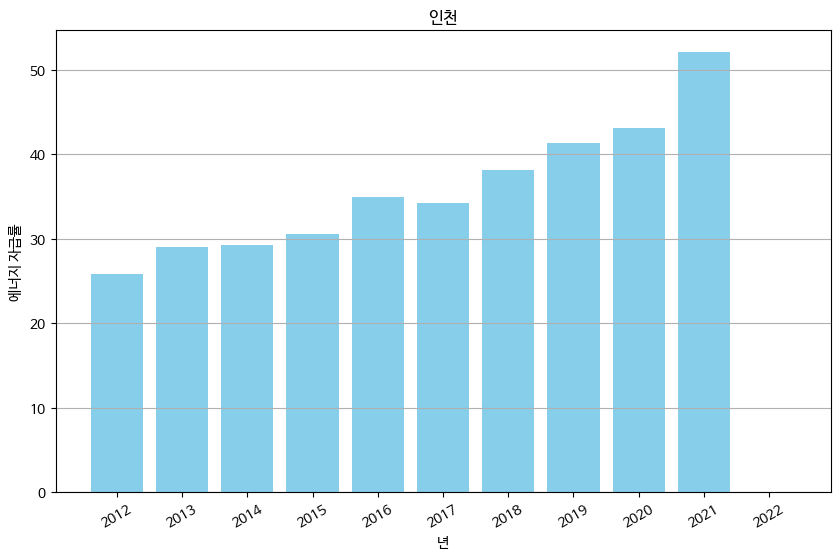

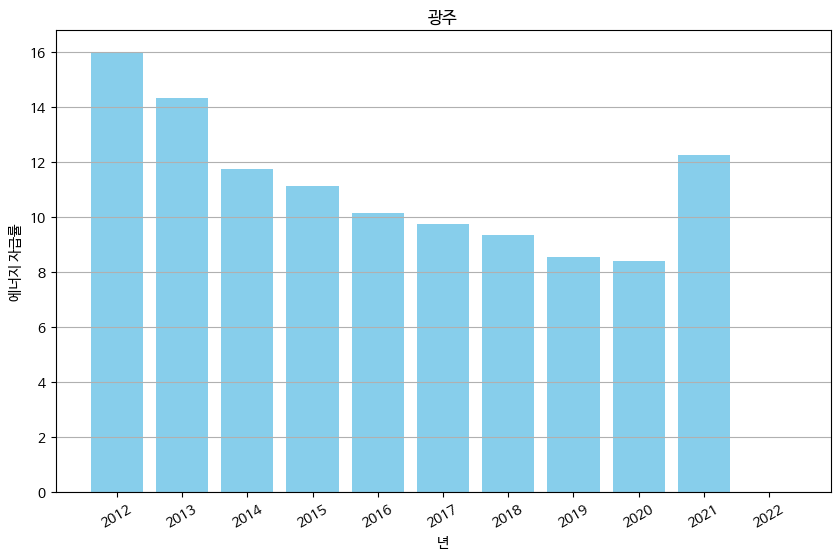

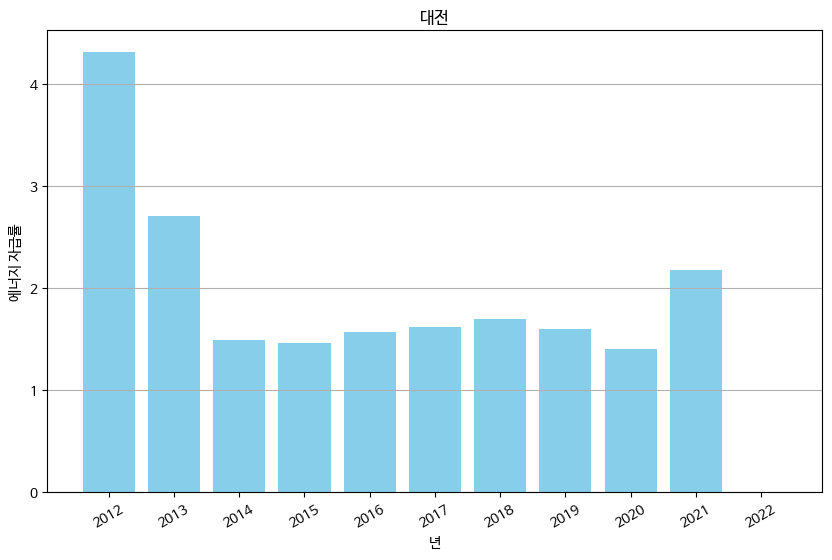

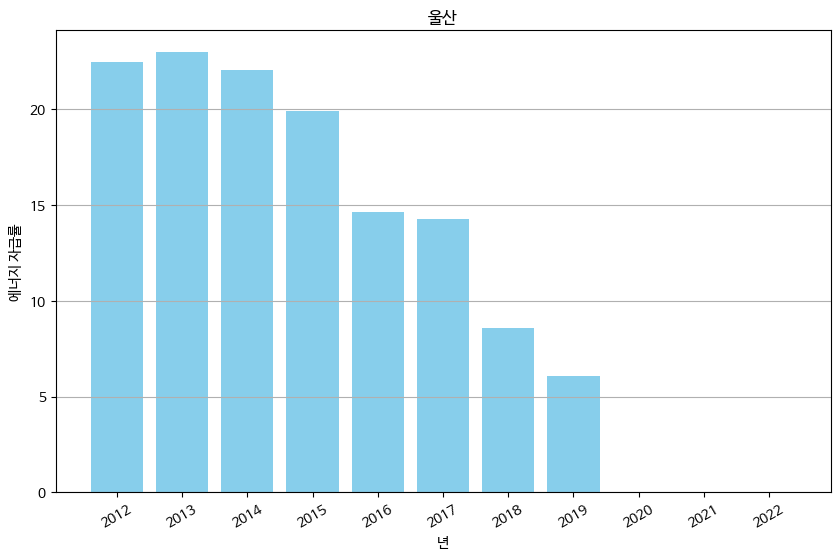

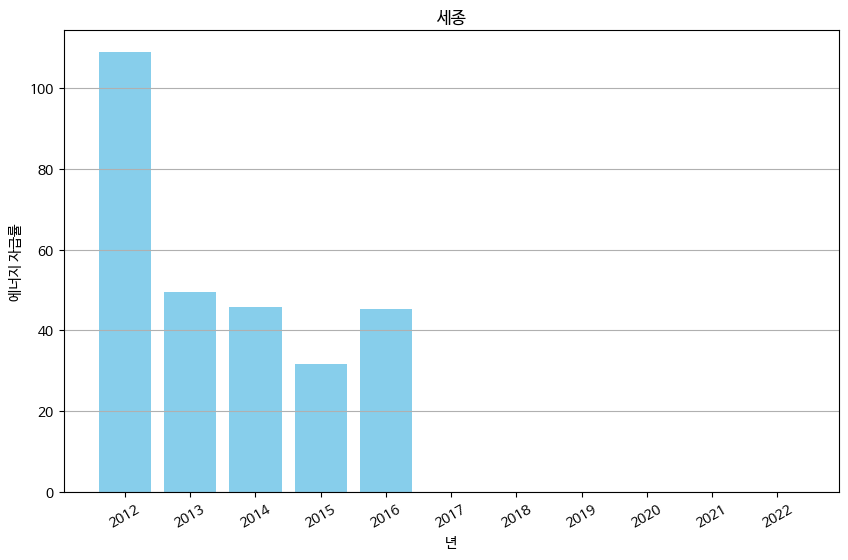

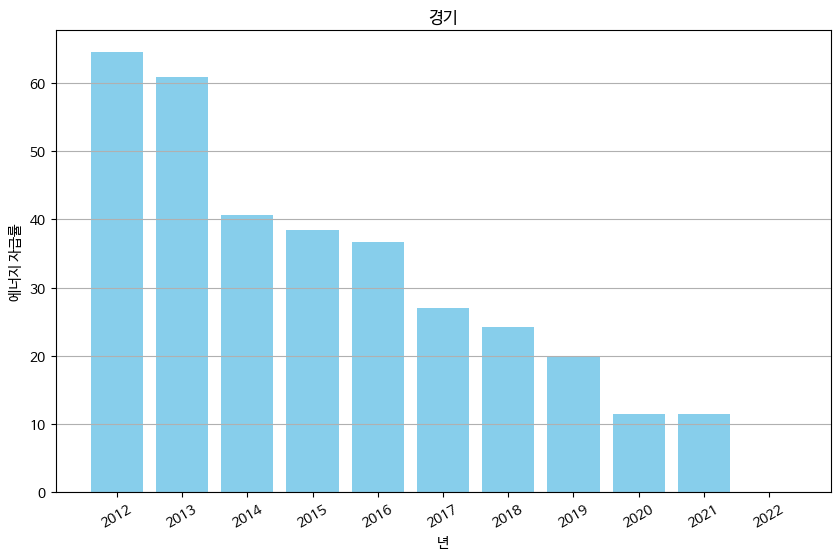

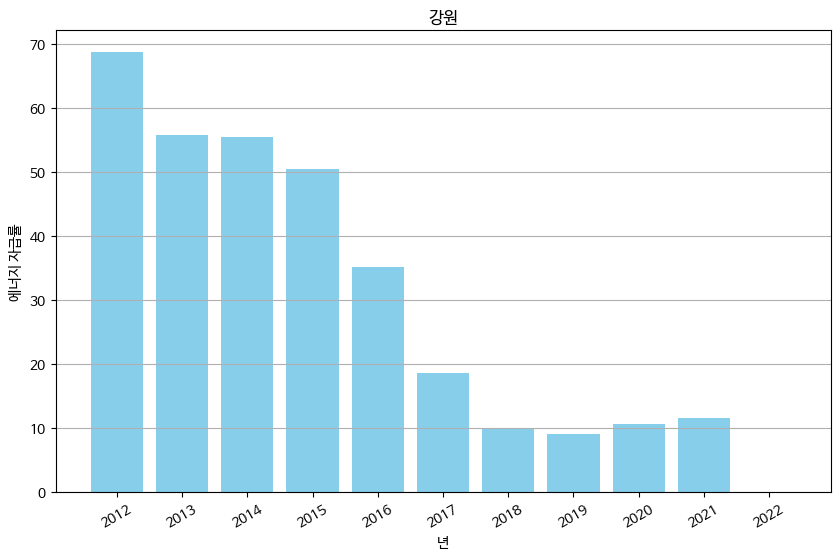

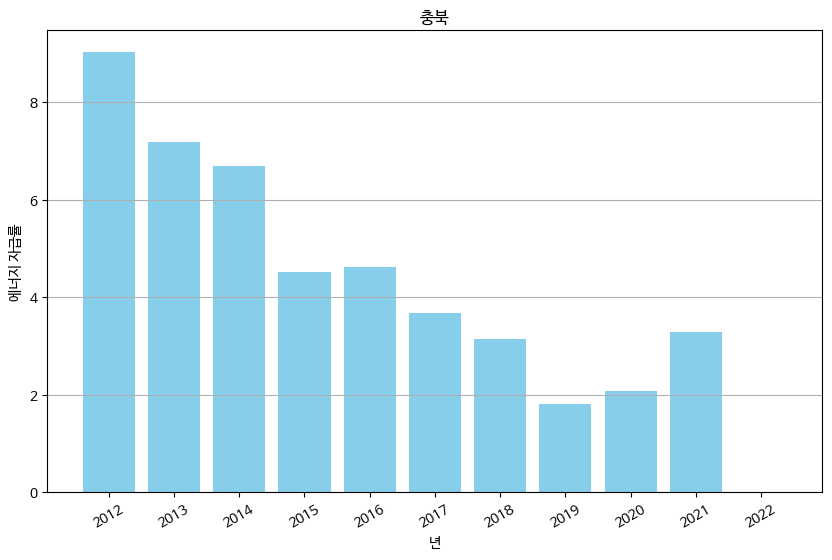

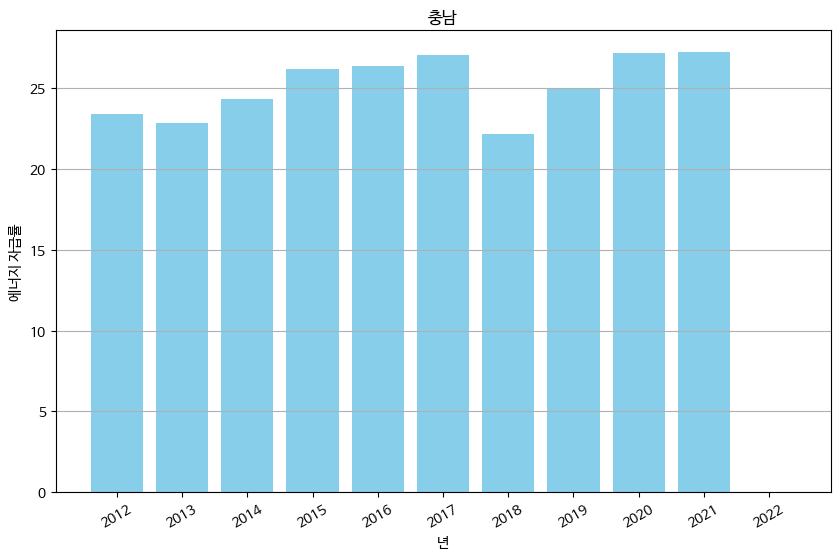

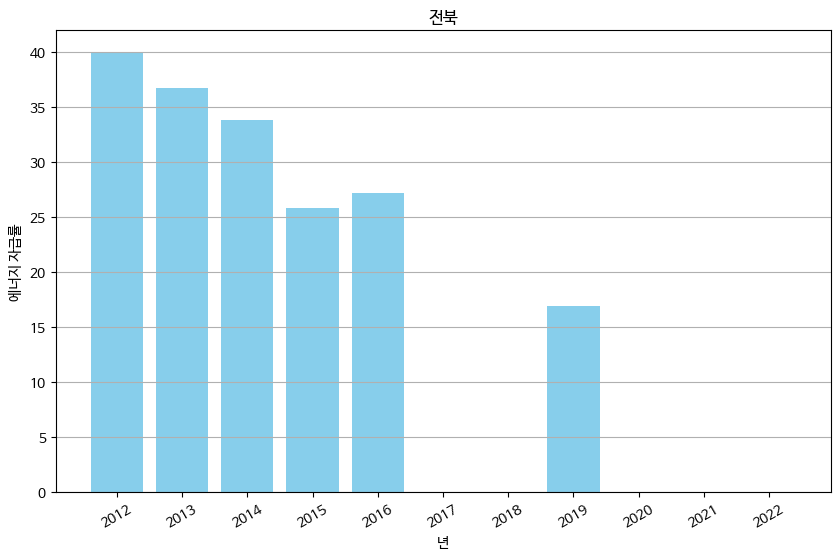

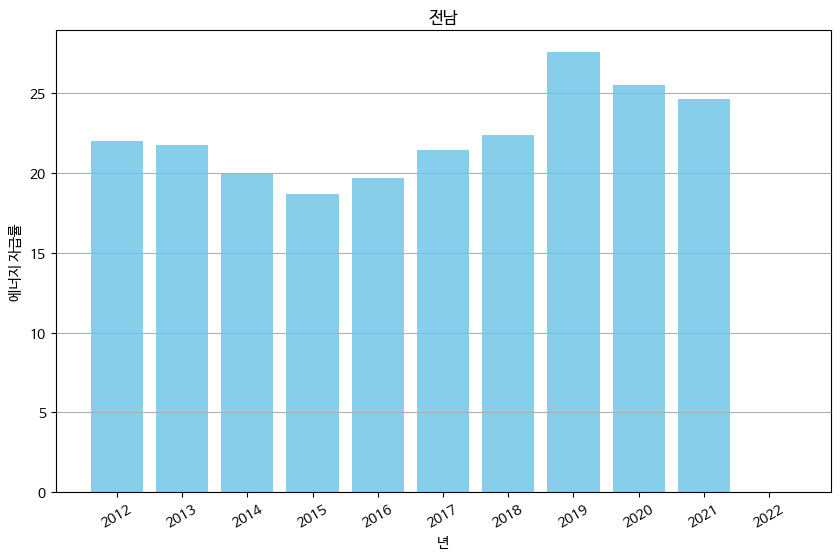

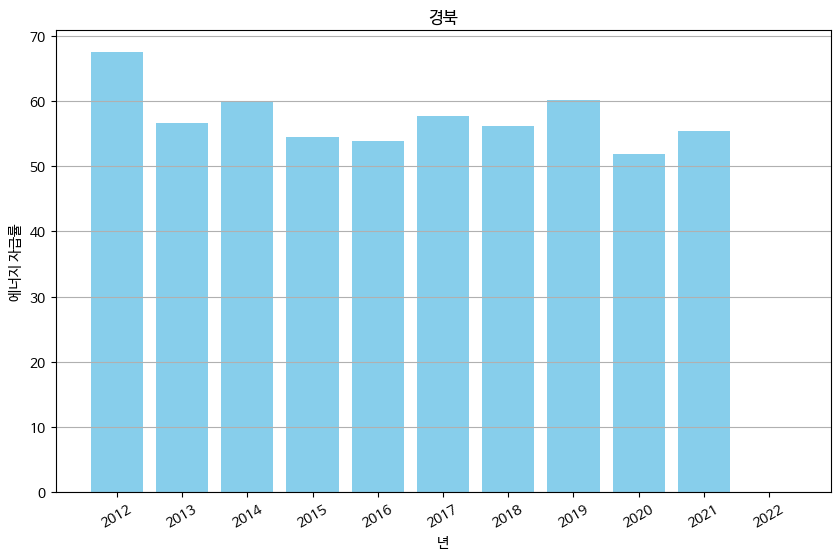

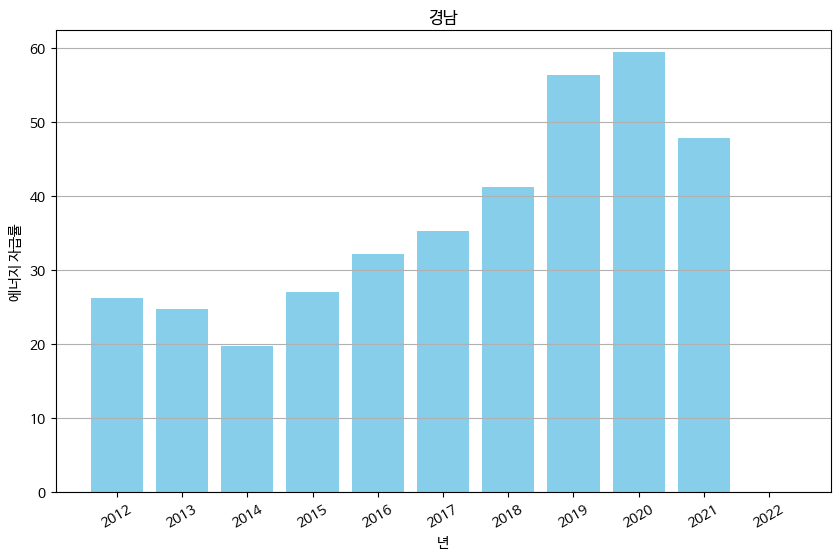

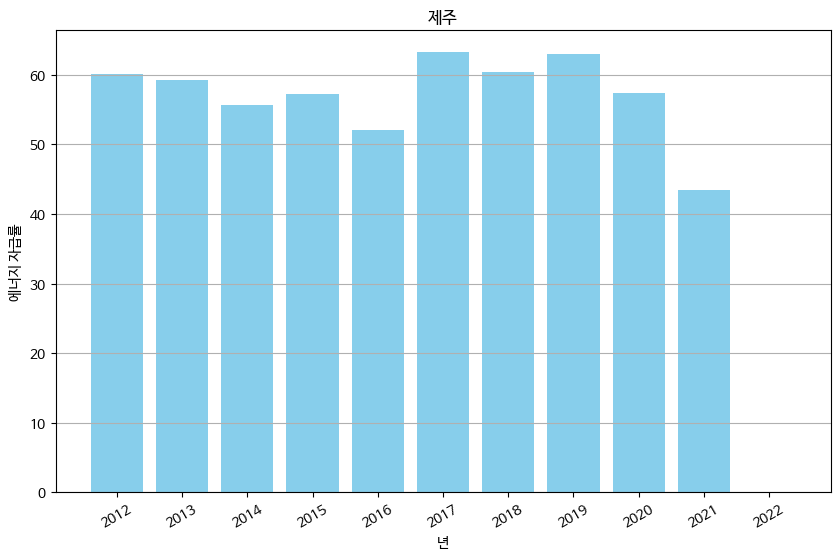

In [106]:
for column in selfsuf.columns:
    plt.figure(figsize=(10, 6))
    plt.bar(selfsuf.index, selfsuf[column], color='skyblue')
    plt.title(column)
    plt.xlabel('년')
    plt.ylabel('에너지 자급률')
    plt.xticks(ticks=selfsuf.index, rotation=30)
    plt.grid(axis='y')
    plt.show()


# 꺾은선 그래프

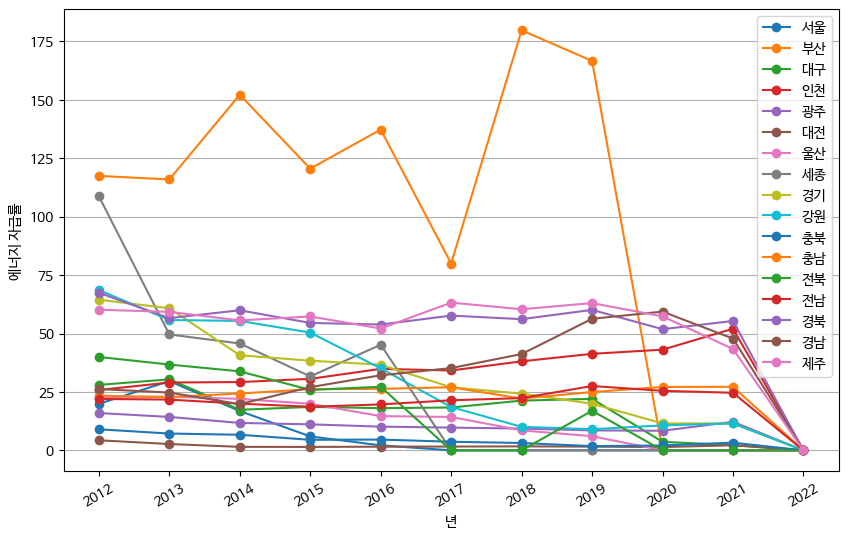

In [104]:
data_without_total = selfsuf.drop(columns=[])

# 그래프를 담을 figure 생성
plt.figure(figsize=(10, 6))

# 각 열의 데이터에 대해 꺾은선 그래프로 추가
for column in data_without_total.columns:
    plt.plot(data_without_total.index, data_without_total[column], marker='o', label=column)

# 그래프에 제목, 레이블, 범례 등 추가
plt.xlabel('년')
plt.ylabel('에너지 자급률')
plt.xticks(ticks=selfsuf.index, rotation=30)
plt.grid(axis='y')
plt.legend()

# 그래프 출력
plt.show()